# Network Analysis for Information Retrieval - Part 1

Elyes KHALFALLAH - 52306355

31/03/2025

---

---


## Exercice 1: Acquerir les données


In [ ]:
# Useful libraries
import nltk
import re

import numpy as np
import pandas as pd
from fonctions import *

# Downloading the necessary datasets for the nltk library
# Only download if necessary
nltk.download("stopwords", quiet=True)
nltk.download("wordnet", quiet=True)


True

In [ ]:
# Import data from data_project.csv
data = pd.read_csv("data_project.csv", sep="\t")

# Show the first 5 rows of the data
data.head()


,venue,abstract,authors,n_citation,references,title,year,id,class
0,international conference on human-computer int...,The purpose of this study is to develop a lear...,"['Makoto Satoh', 'Ryo Muramatsu', 'Mizue Kayam...",0,"['51c7e02e-f5ed-431a-8cf5-f761f266d4be', '69b6...",Preliminary Design of a Network Protocol Learn...,2013,00127ee2-cb05-48ce-bc49-9de556b93346,3
1,visual analytics science and technology,This paper describes the design and implementa...,"['Gareth Beale', 'Graeme Earl']",50,"['10482dd3-4642-4193-842f-85f3b70fcf65', '3133...",A methodology for the physically accurate visu...,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821,3
2,pattern recognition and machine intelligence,This article applied GARCH model instead AR or...,"['Altaf Hossain', 'Faisal Zaman', 'Mohammed Na...",50,"['2d84c0f2-e656-4ce7-b018-90eda1c132fe', 'a083...","Comparison of GARCH, Neural Network and Suppor...",2009,001c8744-73c4-4b04-9364-22d31a10dbf1,4
3,international conference on computer graphics ...,NaN,"['Rafael Álvarez', 'Leandro Tortosa', 'José-Fr...",0,NaN,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,005ce28f-ed77-4e97-afdc-a296137186a1,5
4,international symposium on computer and inform...,NaN,"['Guzin Ulutas', 'Mustafa Ulutas', 'Vasif V. N...",0,"['5626736c-e434-4e2d-8405-54940fab88ab', '8e87...",Improved Secret Image Sharing Method By Encodi...,2011,00701b05-684f-45f9-b281-425abfec482c,8


In [41]:
data.shape

(40596, 9)

In [29]:
data["class"].unique()

array([3, 4, 5, 8, 7, 1, 6, 2])

---

## Exercice 2: Prétraitement des données

### 2.1. Générer le texte sur lequel nous travaillerons


In [ ]:
# Fill NaN values in 'abstract' and 'title' with empty strings and create 'text'
data_text = data.fillna({"abstract": "", "title": ""})

# Concatenate 'title' and 'abstract' into 'text'
data_text["text"] = data_text["title"] + " " + data_text["abstract"]

# Reposition 'text' as the first column
# data_text = data_text.drop(columns=["venue", "abstract", "title"])
cols = ["text"] + [col for col in data_text.columns if col != "text"]
data_text = data_text[cols]

# Show the first 5 rows of the cleaned data
data_text.head()


,text,venue,abstract,authors,n_citation,references,title,year,id,class
0,Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,The purpose of this study is to develop a lear...,"['Makoto Satoh', 'Ryo Muramatsu', 'Mizue Kayam...",0,"['51c7e02e-f5ed-431a-8cf5-f761f266d4be', '69b6...",Preliminary Design of a Network Protocol Learn...,2013,00127ee2-cb05-48ce-bc49-9de556b93346,3
1,A methodology for the physically accurate visu...,visual analytics science and technology,This paper describes the design and implementa...,"['Gareth Beale', 'Graeme Earl']",50,"['10482dd3-4642-4193-842f-85f3b70fcf65', '3133...",A methodology for the physically accurate visu...,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821,3
2,"Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,This article applied GARCH model instead AR or...,"['Altaf Hossain', 'Faisal Zaman', 'Mohammed Na...",50,"['2d84c0f2-e656-4ce7-b018-90eda1c132fe', 'a083...","Comparison of GARCH, Neural Network and Suppor...",2009,001c8744-73c4-4b04-9364-22d31a10dbf1,4
3,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,international conference on computer graphics ...,,"['Rafael Álvarez', 'Leandro Tortosa', 'José-Fr...",0,NaN,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,005ce28f-ed77-4e97-afdc-a296137186a1,5
4,Improved Secret Image Sharing Method By Encodi...,international symposium on computer and inform...,,"['Guzin Ulutas', 'Mustafa Ulutas', 'Vasif V. N...",0,"['5626736c-e434-4e2d-8405-54940fab88ab', '8e87...",Improved Secret Image Sharing Method By Encodi...,2011,00701b05-684f-45f9-b281-425abfec482c,8


In [ ]:
# Show 'text' column of the first row
print(data_text["text"][0])


Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map The purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net- works. More specifically, we focus on the basic principles of network proto- cols as the aim to develop our learning tool. Our tool gives students hands-on experience to help understand the basic principles of network protocols.


### 2.2. Prétraitements poussés


Now, we want to build an index for the data. To do so, we'll :

1. Remove punctuation
2. Lowercase everything
3. Remove useless spaces
4. Remove stop-words
5. Normalize the data (lemmatization)
6. Remove outliers


#### Punctuation removal :


In [ ]:
# Remove all puntuation from 'text' using regex
data_text["text"] = data_text["text"].apply(lambda x: re.sub(r"[^\w\s]", " ", x))

# Show 'text' column of the first row
print(data_text["text"][0])


Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students  Design by an Empirical Study Using a Simple Mind Map The purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net  works  More specifically  we focus on the basic principles of network proto  cols as the aim to develop our learning tool  Our tool gives students hands on experience to help understand the basic principles of network protocols 


#### Lowercase :


In [ ]:
# Convert 'text' to lowercase
data_text["text"] = data_text["text"].str.lower()

# Show 'text' column of the first row
print(data_text["text"][0])


preliminary design of a network protocol learning tool based on the comprehension of high school students  design by an empirical study using a simple mind map the purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net  works  more specifically  we focus on the basic principles of network proto  cols as the aim to develop our learning tool  our tool gives students hands on experience to help understand the basic principles of network protocols 


#### Spaces :


In [ ]:
# Remove useless spaces using regex
data_text["text"] = data_text["text"].apply(lambda x: re.sub(r"\s+", " ", x).strip())

# Show 'text' column of the first row
print(data_text["text"][0])


preliminary design of a network protocol learning tool based on the comprehension of high school students design by an empirical study using a simple mind map the purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net works more specifically we focus on the basic principles of network proto cols as the aim to develop our learning tool our tool gives students hands on experience to help understand the basic principles of network protocols


Lets see what we have for now


c:\Users\elyes.khalfallah\Desktop\MALIA\NetworkAnalysis_SearchEngine\fonctions.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(plot_words), y=list(counts), palette="rainbow_r")


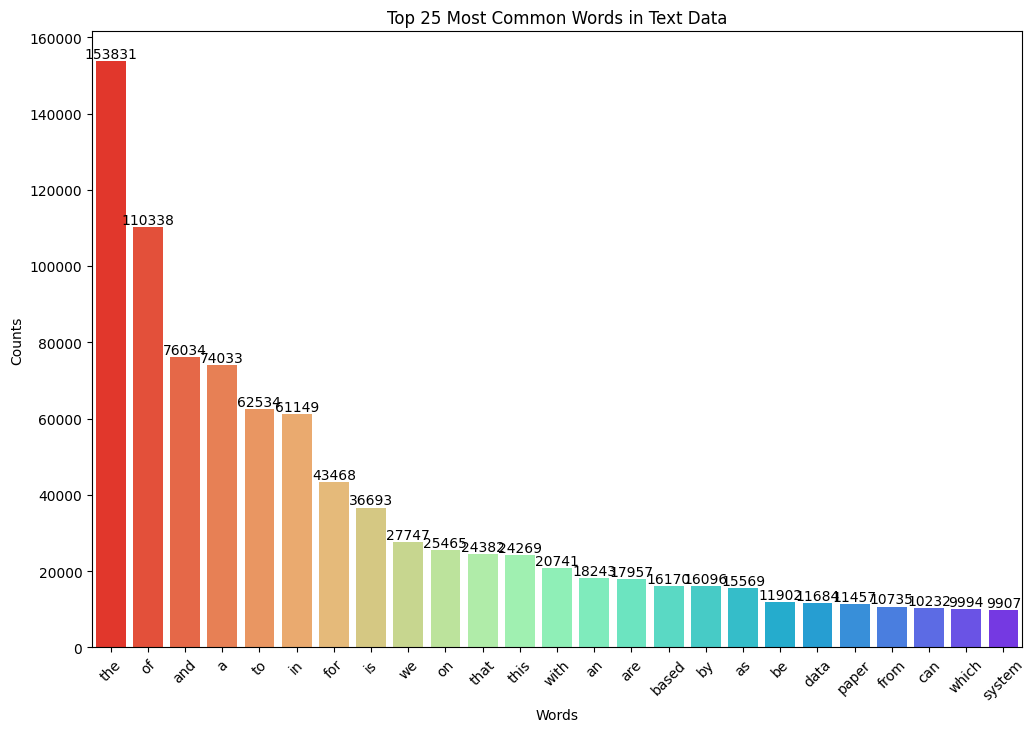

In [ ]:
# Plot the most common words in the 'text' column of data_text
_ = word_occurrences(data_text, visualisation=True)


#### Stop-words :


In [ ]:
# Remove stop words from 'text' column in data_text
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
data_text["text"] = data_text["text"].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)


c:\Users\elyes.khalfallah\Desktop\MALIA\NetworkAnalysis_SearchEngine\fonctions.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(plot_words), y=list(counts), palette="rainbow_r")


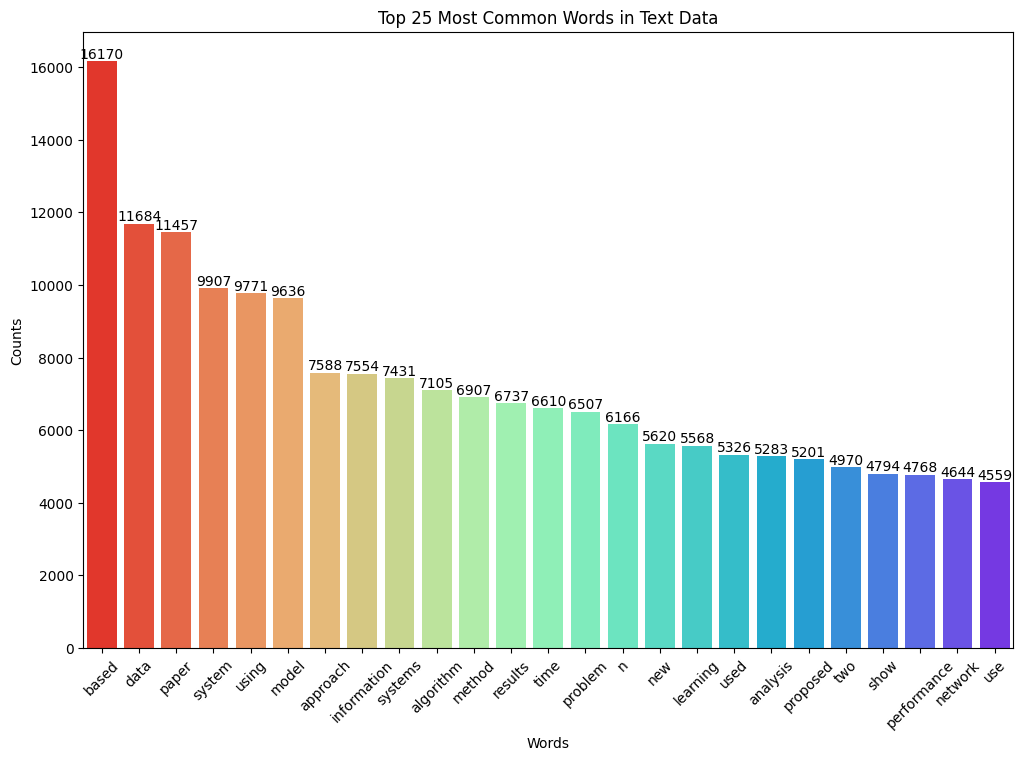

In [ ]:
# Plot the most common words in the 'text' column of data_text
_ = word_occurrences(data_text, visualisation=True)


#### Normalize data (lemming) :


In [ ]:
# Imports for lemmatization
from nltk.stem import WordNetLemmatizer

# Define lemmatizer tool
lemmatizer = WordNetLemmatizer()

# Show the first row to verify the lemmatization
print("Before :\n\t", data_text["text"][0])

# Apply lemmatization to each word in the text
data_text["text"] = data_text["text"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()])
)

# Show the first row to verify the lemmatization
print("After :\n\t", data_text["text"][0])


Before :
	 preliminary design network protocol learning tool based comprehension high school students design empirical study using simple mind map purpose study develop learning tool high school students studying scientific aspects information communication net works specifically focus basic principles network proto cols aim develop learning tool tool gives students hands experience help understand basic principles network protocols
After :
	 preliminary design network protocol learning tool based comprehension high school student design empirical study using simple mind map purpose study develop learning tool high school student studying scientific aspect information communication net work specifically focus basic principle network proto col aim develop learning tool tool give student hand experience help understand basic principle network protocol


c:\Users\elyes.khalfallah\Desktop\MALIA\NetworkAnalysis_SearchEngine\fonctions.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(plot_words), y=list(counts), palette="rainbow_r")


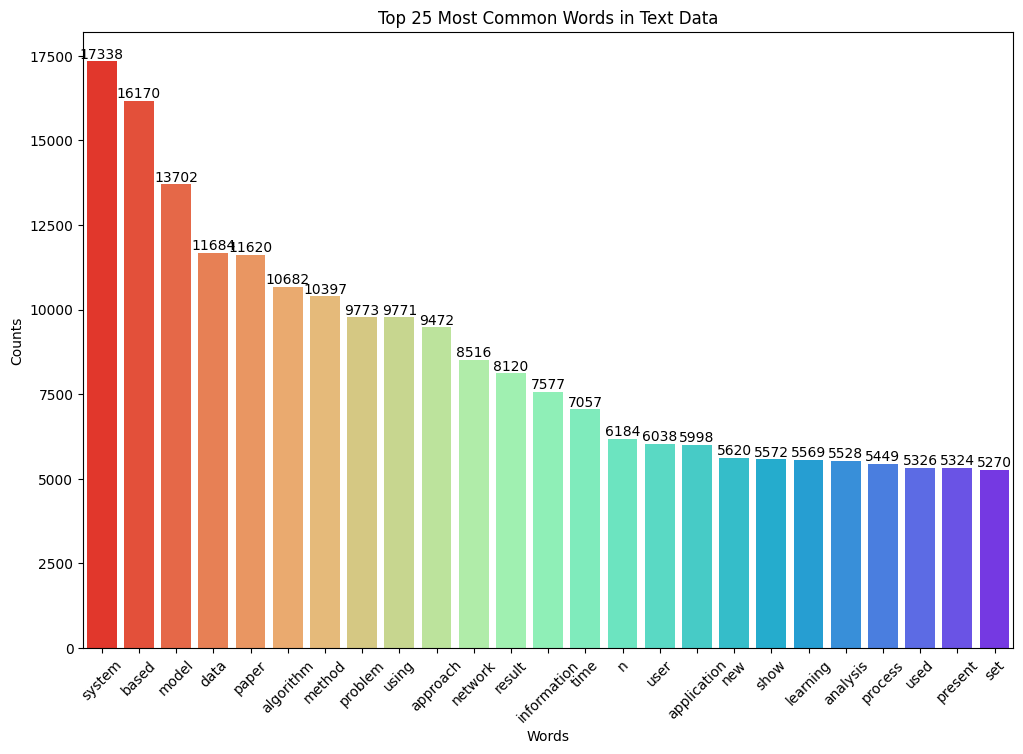

In [ ]:
# Plot the most common words after lemmatization
_ = word_occurrences(data_text, visualisation=True)


#### Remove outliers :


C:\Users\elyes.khalfallah\AppData\Local\Temp\ipykernel_19404\499328142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(list(word_occurrences(data_text).values()), palette="rainbow_r")


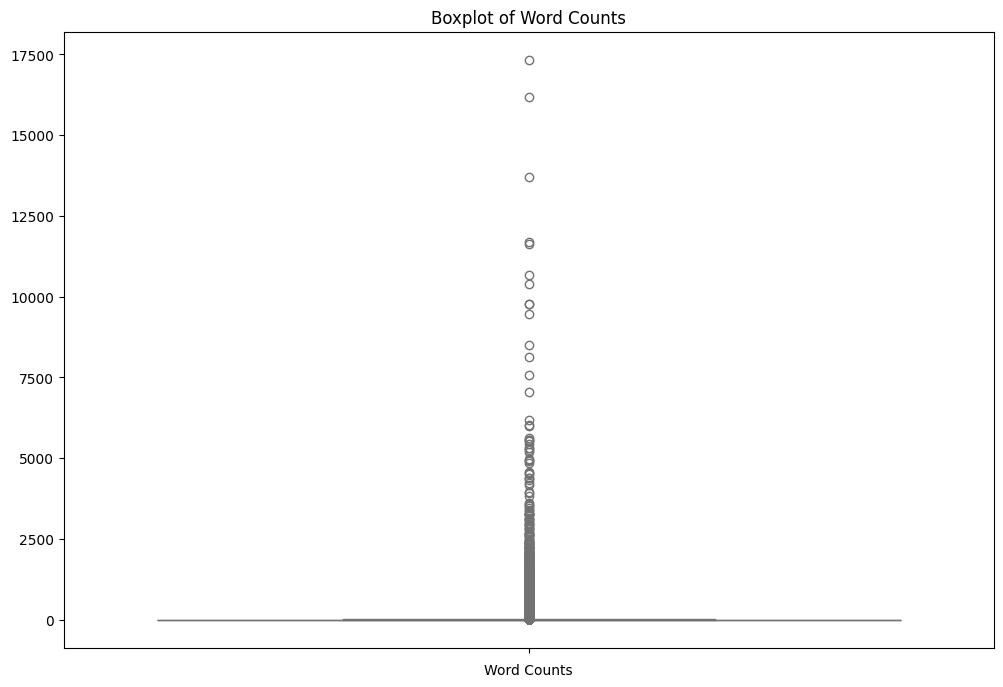

In [ ]:
# See if there are outliers in occurrences
plt.figure(figsize=(12, 8))
sns.boxplot(list(word_occurrences(data_text).values()), palette="rainbow_r")
plt.xlabel("Word Counts")
plt.title("Boxplot of Word Counts")
plt.show()


In [ ]:
occurrences = word_occurrences(data_text)

# Define limits as 82.5th and 95.5th percentiles
min_occurrences = pd.Series(occurrences).quantile(0.825)
max_occurrences = pd.Series(occurrences).quantile(0.955)
print("Min occurrences:", min_occurrences)
print("Max occurrences:", max_occurrences)

# Identify words that have more than max_occurrences occurrences
high_outliers = {
    word: count for word, count in occurrences.items() if count > max_occurrences
}

# Identify words that have less than min_occurrences occurrences
low_outliers = {
    word: count for word, count in occurrences.items() if count < min_occurrences
}

# print("High outliers:", high_outliers)
# print("Low outliers:", low_outliers)

# Remove words that are in high_outliers and low_outliers from 'text' column in data_text
data_text["text"] = data_text["text"].apply(
    lambda x: " ".join(
        [
            word
            for word in x.split()
            if word not in high_outliers and word not in low_outliers
        ]
    )
)


Min occurrences: 10.0
Max occurrences: 105.0


In [ ]:
before = len(occurrences)
after = len(word_occurrences(data_text))
difference = before - after

print("Number of words before removing outliers :", before)
print("Number of words after removing outliers  :", after)
print("Difference (amount of words removed)     :", difference)


Number of words before removing outliers : 55587
Number of words after removing outliers  : 7333
Difference (amount of words removed)     : 48254


On vient de virer les mots qui apparaissent moins de 10 fois ou plus de 105 fois dans notre corpus. Beaucoup de mots sont virés.


C:\Users\elyes.khalfallah\AppData\Local\Temp\ipykernel_19404\499328142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(list(word_occurrences(data_text).values()), palette="rainbow_r")


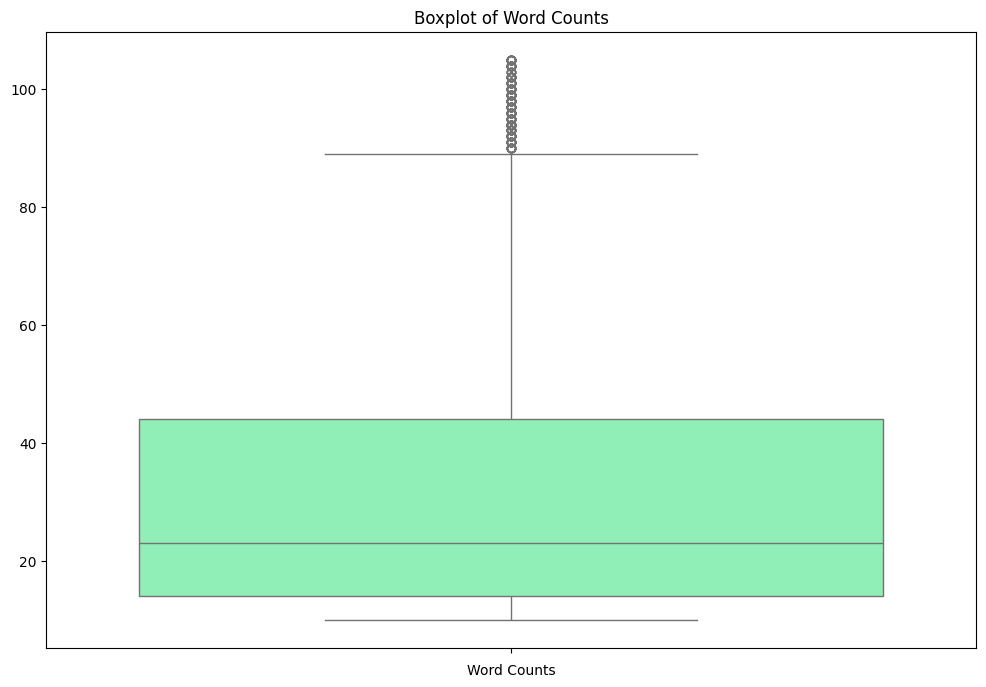

In [ ]:
# See if there are outliers in occurrences
plt.figure(figsize=(12, 8))
sns.boxplot(list(word_occurrences(data_text).values()), palette="rainbow_r")
plt.xlabel("Word Counts")
plt.title("Boxplot of Word Counts")
plt.show()


c:\Users\elyes.khalfallah\Desktop\MALIA\NetworkAnalysis_SearchEngine\fonctions.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(plot_words), y=list(counts), palette="rainbow_r")


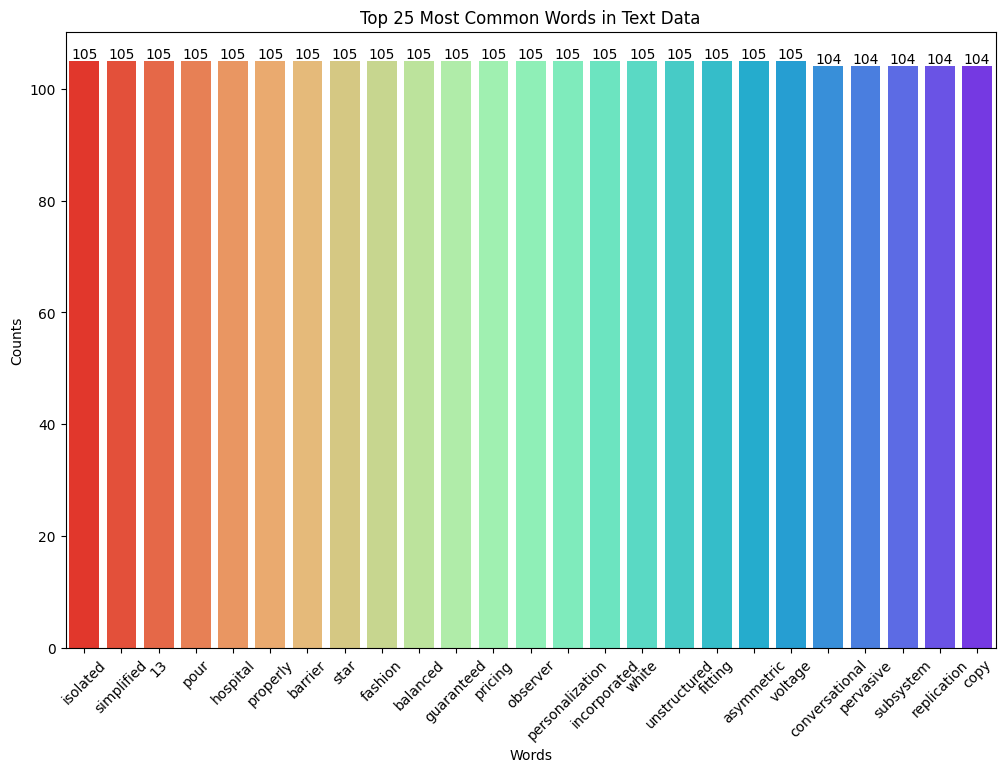

In [ ]:
clean_word_counts = word_occurrences(data_text, visualisation=True)


---

## Exercice 3: Mise en place du moteur de recherche


In [ ]:
# Nous allons maintenant construire la matrice Documents x Termes en adoprant le schéma de pondération TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Define the vectorizer
tf_vectorizer = TfidfVectorizer(use_idf=False)
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the 'text' column
X_tf = tf_vectorizer.fit_transform(data_text["text"])
X_tfidf = tfidf_vectorizer.fit_transform(data_text["text"])

# Show the shape of the resulting matrix
X_tfidf.shape


(40596, 7310)

In [ ]:
# from sklearn.manifold import TSNE
# # visualiser TFIDF

# tsne_transform = TSNE(n_components=3, random_state=42)
# X_embedded = tsne_transform.fit_transform(X[:1000].toarray())
# print(f"shape de l'embedding {X_embedded.shape}")
# plt.figure(figsize=(10, 10))
# plt.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=data_text[:1000]["class"], cmap="tab10")
# plt.colorbar()
# plt.show()


In [ ]:
# Creer la requete sous forme d'une phrase
requete = "Representation learning for natural language processing"

# Transformer la requete en un tableau de mots
requete_termes = re.sub(r"[^\w\s]", " ", requete).lower().split()

# Creer des pseudo-documents pour la requete
pseudo_document_tf = tf_vectorizer.transform([" ".join(requete_termes)])
pseudo_document_tfidf = tfidf_vectorizer.transform([" ".join(requete_termes)])


In [ ]:
# Calculer les similarités cosinus entre le pseudo-document et les documents
similarities_tf = cosine_similarity(X_tf, pseudo_document_tf)
similarities_tfidf = cosine_similarity(X_tfidf, pseudo_document_tfidf)

# Afficher les 5 documents les plus similaires
top5_tf = np.argsort(similarities_tf.flatten())[::-1][:5]
top5_tfidf = np.argsort(similarities_tfidf.flatten())[::-1][:5]

# Afficher les 5 documents les plus similaires avec TF
print(f"{' '*20}TF :\n{top5_tf = }\n{similarities_tf[top5_tf].flatten() = }\n")
print(data_text.iloc[top5_tf].drop(columns=["text", "abstract", "references"]))

# Afficher les 5 documents les plus similaires avec TFIDF
print(
    f"\n{' '*20}TFIDF :\n{top5_tfidf = }\n{similarities_tfidf[top5_tfidf].flatten() = }\n"
)
print(data_text.iloc[top5_tfidf].drop(columns=["text", "abstract", "references"]))

# Print les titres des 5 documents les plus similaires
print(data_text.iloc[top5_tf]["title"], "\n\n\n\n")
print(data_text.iloc[top5_tfidf]["title"])


                    TF :
top5_tf = array([    0, 40595, 40594, 40593, 40592])
similarities_tf[top5_tf].flatten() = array([0., 0., 0., 0., 0.])

                                                   venue  \
0      international conference on human-computer int...   
40595                            Object Oriented Systems   
40594  european conference on information warfare and...   
40593     pacific asia conference on information systems   
40592               asia information retrieval symposium   

                                                 authors  n_citation  \
0      ['Makoto Satoh', 'Ryo Muramatsu', 'Mizue Kayam...           0   
40595  ['Jin Song Dong', 'Roger Duke', 'Gordon A. Rose']           9   
40594  ['Rauno Kuusisto', 'Tuija Kuusisto', 'Leigh Ar...           4   
40593            ['Qian Li', 'Yu Chen', 'Lanfang Zhang']           0   
40592  ['Rajendra Prasath', 'Aidan Maurice Duane', 'P...           0   

                                                   title  year

In [ ]:
# Meme code que cellule d'avant, mais avec la distance euclidienne
similarities_tf = euclidean_distances(X_tf, pseudo_document_tf)
similarities_tfidf = euclidean_distances(X_tfidf, pseudo_document_tfidf)

# Afficher les 5 documents les plus similaires
top5_tf = np.argsort(similarities_tf.flatten())[::-1][:5]
top5_tfidf = np.argsort(similarities_tfidf.flatten())[::-1][:5]

# Afficher les 5 documents les plus similaires avec TF
print(f"{' '*20}TF :\n{top5_tf = }\n{similarities_tf[top5_tf].flatten() = }\n")
print(data_text.iloc[top5_tf].drop(columns=["text", "abstract", "references"]))

# Afficher les 5 documents les plus similaires avec TFIDF
print(
    f"\n{' '*20}TFIDF :\n{top5_tfidf = }\n{similarities_tfidf[top5_tfidf].flatten() = }\n"
)
print(data_text.iloc[top5_tfidf].drop(columns=["text", "abstract", "references"]))

# Print les titres des 5 documents les plus similaires
print(data_text.iloc[top5_tf]["title"], "\n\n\n\n")
print(data_text.iloc[top5_tfidf]["title"])


                    TF :
top5_tf = array([ 2955, 25434, 26289, 26027, 19371])
similarities_tf[top5_tf].flatten() = array([1., 1., 1., 1., 1.])

                                                   venue  \
2955         international conference on web engineering   
25434                     Annales Des Télécommunications   
26289                  Lecture Notes in Computer Science   
26027  conference of the international speech communi...   
19371              new interfaces for musical expression   

                                                 authors  n_citation  \
2955   ['Maria Maleshkova', 'Carlos Pedrinaci', 'Dong...           0   
25434              ['Sylvain Guilley', 'Renaud Pacalet']          29   
26289                             ['Kenneth R. Beesley']           0   
26027  ['Tomoko Ohsuga', 'Masafumi Nishida', 'Yasuo H...          14   
19371                                  ['Staas de Jong']           0   

                                                   title  year

Talk about :

- TF requiring stopwords removed, and TDIDF requiring stop words not removed
- Euclidian distances donc function in higher dimensions (if you do TF and TFIDF scores with euclidian distances, you'll get the exact same score every time (curse of high dimensionnality))
- Don't remove stopwords ?


# TD2


## Exercice 4 : Structurer le corpus


### espace des mots (avec les différents systèmes de pondération)


In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=8, random_state=10).fit(X_tfidf)




In [46]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], shape=(40596,), dtype=int32)

In [47]:
from sklearn.manifold import TSNE
import numpy as np

# Reduce to 2D for visualization
tSNE = TSNE(n_components=2)
X_tsne = tSNE.fit_transform(X_tfidf.toarray())  # Convert sparse matrix to dense if necessary

# Get cluster labels
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.title("KMeans Clustering (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


### espace de plongement (naif, Doc2Vec, autres)


### espace thématique (par ex. avec LDA)
